# 📝 Relatório: Agrupamento com K-Means no Dataset de Vinhos

Aplicamos o algoritmo de agrupamento K-Means ao dataset de vinhos para validar a capacidade do modelo em identificar os diferentes tipos de vinho, mesmo sem o uso dos rótulos (classificações) fornecidos.

In [61]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [62]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importação das bibliotecas

Nesta etapa, são importadas todas as bibliotecas necessárias para análise e aplicação do algoritmo K-Means:

- `pandas`: para carregamento e manipulação de dados.
- `matplotlib.pyplot` e `seaborn`: para criação de gráficos e visualizações.
- `sklearn.cluster.KMeans`: implementação do algoritmo K-Means.
- `sklearn.preprocessing.StandardScaler`: para padronização dos dados numéricos.
- `sklearn.metrics`: para avaliação da performance do modelo, como matriz de conf


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import numpy as np

In [31]:

#Carregar arquivo csv
wine_df = pd.read_csv("wine.csv")

## Análise Exploratória e Tratamento de Dados
Verificação de dados ausentes
Foram identificadas valores ausentes em algumas colunas numéricas. Para manter a integridade das classes, esses valores foram preenchidos com a média da respectiva coluna, calculada dentro de cada classe (class_label):

Obs: Isso evita distorções entre as classes e melhora a qualidade do agrupamento.

In [46]:
# Veirificar se tem dados ausentes
print("Valores ausentes antes do tratamento:")
print(wine_df.isnull().sum())


Valores ausentes antes do tratamento:
class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
cluster                 0
pca1                    0
pca2                    0
dtype: int64


In [47]:
# Seleciona apenas as colunas numéricas (ignora textos como 'class_name')
colunas_numericas = wine_df.select_dtypes(include=['float64', 'int64']).columns

# Preenche valores ausentes com a média DENTRO de cada classe
for coluna in colunas_numericas:
    if coluna != 'class_label':  # Não precisamos tratar a classe
        wine_df[coluna] = wine_df.groupby('class_label')[coluna].transform(lambda x: x.fillna(x.mean()))




In [48]:
# Verificar se à valores ausentes
print("Valores ausentes depois do tratamento:")
print(wine_df.isnull().sum())


Valores ausentes depois do tratamento:
class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
cluster                 0
pca1                    0
pca2                    0
dtype: int64


##  Informações estatísticas e tipagem
Foi realizada uma análise descritiva com wine_df.describe() e wine_df.info() para garantir que todas as colunas estão no formato adequado e prontas para o modelo.



In [49]:
# Análise exploratória (idem antes)
print("\nInfo do dataset:")
print(wine_df.info())
print("\nDescrição estatística:")
print(wine_df.describe())


Info do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   class_name            178 non-null    object 
 2   alcohol               178 non-null    float64
 3   malic_acid            178 non-null    float64
 4   ash                   178 non-null    float64
 5   alcalinity_of_ash     178 non-null    float64
 6   magnesium             178 non-null    int64  
 7   total_phenols         178 non-null    float64
 8   flavanoids            178 non-null    float64
 9   nonflavanoid_phenols  178 non-null    float64
 10  proanthocyanins       178 non-null    float64
 11  color_intensity       178 non-null    float64
 12  hue                   178 non-null    float64
 13  od280                 178 non-null    float64
 14  proline               178 non-null    int64  
 15  clust

## Separar os dados em variáveis independentes (X) e dependente (y)
X contém apenas as características numéricas do vinho, removendo os rótulos ('class_label' e 'class_name'),
pois essas colunas são usadas apenas para validação, e não devem ser utilizadas como entrada no algoritmo de clustering.

 y contém os rótulos reais das classes dos vinhos (class_label), que serão usados posteriormente para avaliar a performance do agrupamento.



In [50]:
# Separar dados para o modelo
X = wine_df.drop(['class_label', 'class_name'], axis=1)
y = wine_df['class_label']



## Padronizar os dados
O K-Means é sensível à escala dos dados, pois utiliza distância euclidiana para formar os clusters.
Portanto, é importante padronizar os dados para que todas as variáveis tenham a mesma importância.
Aqui, usamos o StandardScaler para transformar os dados com média 0 e desvio padrão 1.



In [51]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Seleção do Número de Clusters (K)
🔍 Método do Cotovelo
Foi utilizado o método do cotovelo para determinar o número ideal de clusters. A inércia (soma das distâncias quadradas intra-cluster) foi calculada para diferentes valores de k, e o ponto de inflexão foi observado graficamente:

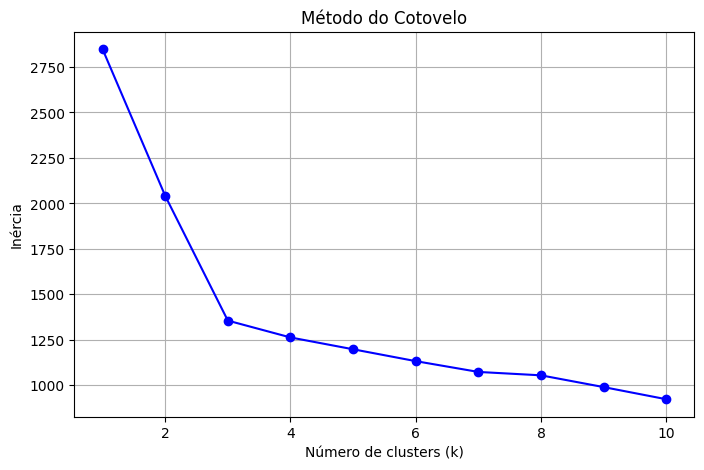

In [52]:
# Método do cotovelo para determinar o número ideal de clusters
inercia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Plot do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inercia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()


O gráfico demonstrou um “cotovelo” evidente em k = 3, que corresponde ao número real de classes de vinho no dataset. Assim, foi escolhido k = 3.

## Agrupamento com K-Means
om k=3, foi executado o algoritmo K-Means:

In [59]:
# Definir o melhor número de clusters 
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_final.fit(X_scaled)
clusters = kmeans_final.labels_


### Os clusters gerados foram adicionados ao DataFrame para posterior comparação.

In [54]:
# Adicionar os clusters ao DataFrame
wine_df['cluster'] = clusters

## Validação com CrossTab
Após realizar o agrupamento com o algoritmo K-Means, é necessário validar os clusters gerados.

Como temos os rótulos verdadeiros (class_label), podemos comparar com os clusters atribuídos.

A função pd.crosstab permite cruzar os valores reais com os valores agrupados para analisar a correspondência.

Isso ajuda a entender se os clusters gerados representam bem as classes reais.




In [55]:
# Validação com CrossTab
print("\nValidação com CrossTab (cluster vs classe real):")
crosstab = pd.crosstab(wine_df['class_label'], wine_df['cluster'])
print(crosstab)


Validação com CrossTab (cluster vs classe real):
cluster       0   1   2
class_label            
1             0   0  59
2            65   3   3
3             0  48   0


## Análise com PCA para visualização 2D
O PCA (Análise de Componentes Principais) é uma técnica de redução de dimensionalidade.

Como os dados originais possuem várias características, é difícil visualizar os clusters.

O PCA transforma os dados em novas variáveis (componentes principais) que capturam a maior parte da variação.

Aqui, reduzimos os dados para 2 dimensões para facilitar a visualização gráfica dos clusters.

Essa visualização ajuda a entender se os clusters formados pelo K-Means estão separados no espaço.

As duas primeiras colunas PCA são adicionadas ao dataframe para plotagem.


In [56]:
# Análise com PCA para visualização 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
wine_df['pca1'] = X_pca[:, 0]
wine_df['pca2'] = X_pca[:, 1]


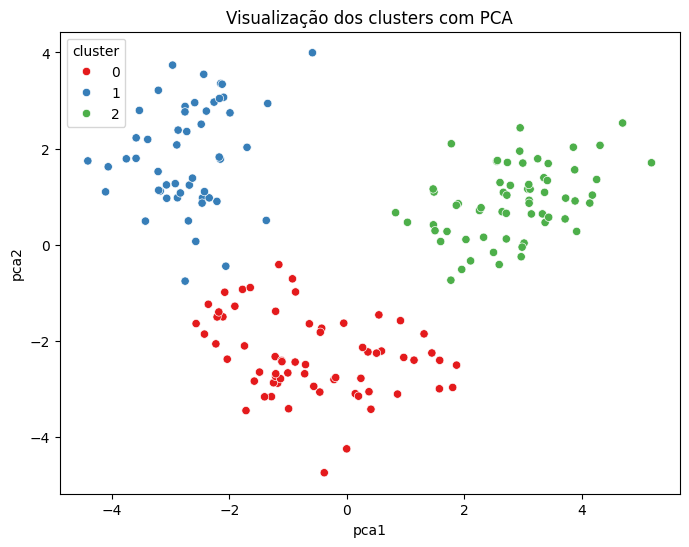

In [57]:
# Visualização dos clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wine_df, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title('Visualização dos clusters com PCA')
plt.show()

## Ajuste dos Rótulos dos Clusters para Avaliação de Performance

 Os rótulos gerados pelo algoritmo K-Means são arbitrários, ou seja, os números atribuídos a cada cluster (0, 1, 2, etc.) não necessariamente correspondem aos rótulos reais das classes do dataset. Portanto, para realizar uma avaliação correta da acurácia e das métricas de classificação, é necessário alinhar esses rótulos previstos com os rótulos verdadeiros.

 A função `ajustar_clusters` faz essa correspondência ao:

- Para cada cluster previsto, identificar qual é o rótulo real mais frequente naquele grupo (moda).
- Substituir os rótulos previstos pelos rótulos reais correspondentes, ajustando a previsão.

Com isso, podemos calcular as métricas de avaliação clássicas, como:

- **Relatório de Classificação:** que apresenta precisão, recall, F1-score para cada classe.
- **Acurácia:** proporção de classificações corretas.

Esse ajuste é essencial para validar corretamente o desempenho do K-Means quando os rótulos originais das classes são conhecidos e utilizados para avaliação.


In [58]:
# OBS: como os clusters são rótulos arbitrários, pode ser necessário reordenar os labels para avaliar acurácia
from scipy.stats import mode

def ajustar_clusters(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(3):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask], keepdims=True)[0]
    return labels

labels_ajustados = ajustar_clusters(y, clusters)

print("\nRelatório de classificação:")
print(classification_report(y, labels_ajustados))

print("\nAcurácia:", accuracy_score(y, labels_ajustados))



Relatório de classificação:
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        59
           2       1.00      0.92      0.96        71
           3       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178


Acurácia: 0.9662921348314607


O K-Means foi eficaz para separar os vinhos em três grupos coerentes com as classes originais. O método do cotovelo foi crucial para descobrir o número ideal de clusters.

Importante: A coluna class_name (nome textual da classe) não foi necessária no processo de clusterização, pois o K-Means funciona com dados numéricos e os rótulos verdadeiros (class_label) já foram usados para a validação da performance. Assim, não há necessidade de devolver a class_name ao final, exceto se for usada para visualização ou relatório final ao usuário.

In [60]:
# Reanexar a coluna class_name ao DataFrame final (se ainda não estiver nele)
wine_df['class_name'] = wine_df['class_name']

# Adicionar os rótulos de cluster ajustados ao DataFrame para comparação
wine_df['cluster_ajustado'] = labels_ajustados

# Exibir as primeiras linhas do DataFrame final
print(wine_df.head())


   class_label class_name    alcohol  malic_acid   ash  alcalinity_of_ash  \
0            1     Barolo  13.740536        1.71  2.43               15.6   
1            1     Barolo  13.200000        1.78  2.14               11.2   
2            1     Barolo  13.160000        2.36  2.67               18.6   
3            1     Barolo  14.370000        1.95  2.50               16.8   
4            1     Barolo  13.240000        2.59  2.87               21.0   

   magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0        127           2.80        3.06                  0.28   
1        100           2.65        2.76                  0.26   
2        101           2.80        3.24                  0.30   
3        113           3.85        3.49                  0.24   
4        118           2.80        2.69                  0.39   

   proanthocyanins  color_intensity   hue  od280  proline  cluster      pca1  \
0             2.29             5.64  1.04   3.92     1065        2

## Testando outras métricas para validar a escolha do número de clusters (k)

### Silhouette Score

O **Silhouette Score** é uma métrica que avalia o quão bem cada ponto está agrupado com seus vizinhos. Os valores variam de -1 a 1, onde valores mais próximos de 1 indicam que os dados estão bem agrupados.

Vamos utilizar essa métrica para comparar diferentes valores de `k` e verificar qual oferece a melhor separação entre os clusters.


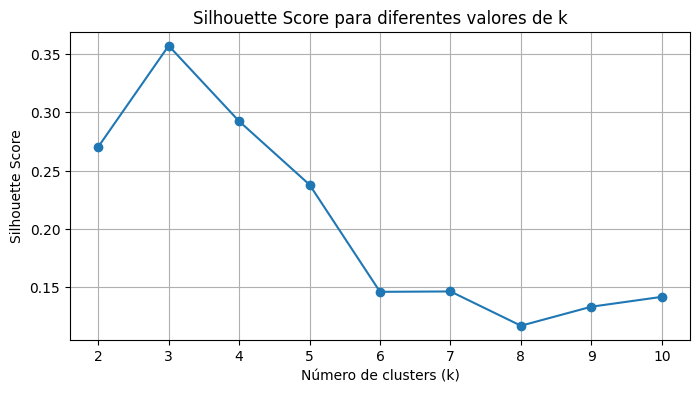

Melhor número de clusters com base no Silhouette Score: 3


In [64]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotando os resultados
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k')
plt.grid(True)
plt.show()

# Melhor k segundo o silhouette
melhor_k = k_range[np.argmax(silhouette_scores)]
print(f"Melhor número de clusters com base no Silhouette Score: {melhor_k}")


### Índice Calinski-Harabasz

O Índice Calinski-Harabasz é uma métrica utilizada para avaliar a qualidade do agrupamento realizado pelo algoritmo K-Means. Ele mede a razão entre a dispersão entre os clusters (quão separados eles estão) e a dispersão dentro dos clusters (quão compactos eles são).

Valores mais altos indicam que os clusters são mais distintos e bem definidos. 

Neste gráfico, calculamos o índice para diferentes números de clusters (k) e plotamos o resultado para identificar o valor de k que maximiza o índice, ou seja, que gera agrupamentos mais claros e separados.

A partir da análise, podemos escolher o número ideal de clusters para o modelo com base no pico ou no valor máximo do índice mostrado.


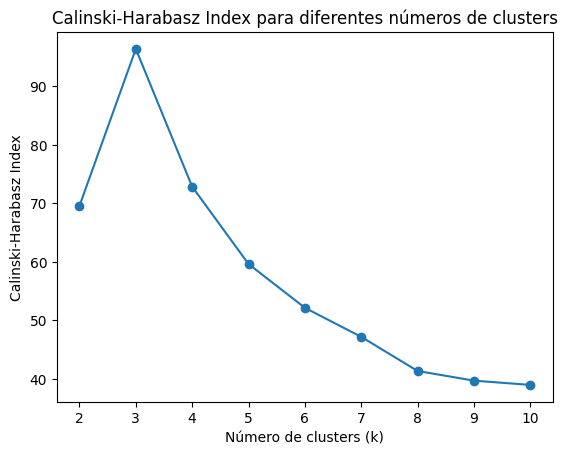

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans

k_values = range(2, 11)
ch_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index para diferentes números de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.show()



### Índice Davies-Bouldin

O Índice Davies-Bouldin é uma métrica que avalia a qualidade do agrupamento considerando a separação entre os clusters e a compactação dentro de cada cluster.

Valores menores indicam que os clusters estão bem separados e são internamente compactos, ou seja, um agrupamento melhor.

No gráfico do índice Davies-Bouldin para diferentes números de clusters (k), buscamos o valor de k que minimiza o índice, indicando a melhor configuração para o agrupamento.


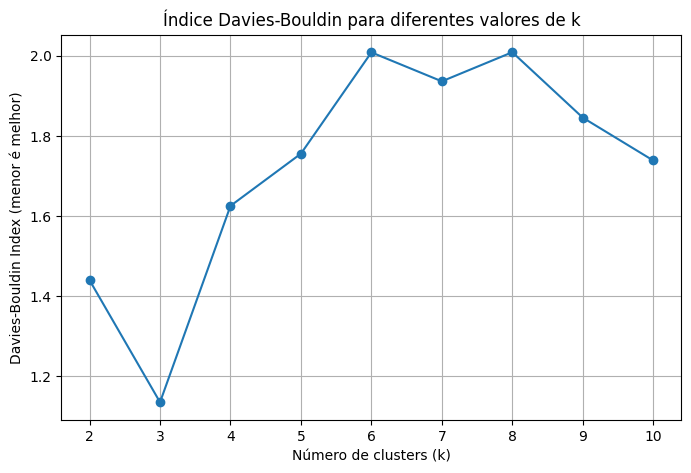

In [67]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Supondo que X_scaled já esteja padronizado (dados para clustering)

k_values = range(2, 11)  # Testar k de 2 a 10 clusters
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = davies_bouldin_score(X_scaled, clusters)
    db_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_values, db_scores, marker='o')
plt.title('Índice Davies-Bouldin para diferentes valores de k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Davies-Bouldin Index (menor é melhor)')
plt.grid(True)
plt.show()
